<a href="https://colab.research.google.com/github/argxsL/CCMACLRL_EXERCISES_COM231ML/blob/main/A1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 KNN
Using k-Nearest Neighbours, predict if a student will Pass (1) or Fail (0) based on:

X
1
 = Hours Studied

X
2
 = Sleep Hours

## A. Import libraries

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [22]:
# Converts csv to dataframe
data = pd.read_excel('/content/sample_data/a1Data.xlsx')

data.head()

,Student,HoursStudied,SleepHours,Pass
0,1,1.0,5.0,0
1,2,2.0,5.5,0
2,3,3.0,6.0,0
3,4,4.5,5.0,0
4,5,5.0,6.5,1


Display the summary of all the features of the dataset using `.info()`

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student       10 non-null     int64  
 1   HoursStudied  10 non-null     float64
 2   SleepHours    10 non-null     float64
 3   Pass/Fail     10 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 452.0 bytes


Display the total number of samples from each label using `.value_counts()`

In [23]:
data['Pass'].value_counts()

,count
Pass,
1,6
0,4


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

In [24]:
passed = data[data.Pass == 1]

Remove the name column using `drop()` method

In [25]:
# Removes Name column
data.drop(columns='Student', inplace=True)

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [26]:
# Array of features
X = data.drop(columns=['Pass']).values


Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [28]:
# Array of Labels
y = data['Pass'].values

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)


Display the dimensions of each variables using `.shape()`

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8, 2)
(8,)
(2, 2)
(2,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)

Train the model using the `.fit()`

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Test the model using the `.predict()`

In [33]:
# Test the model
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

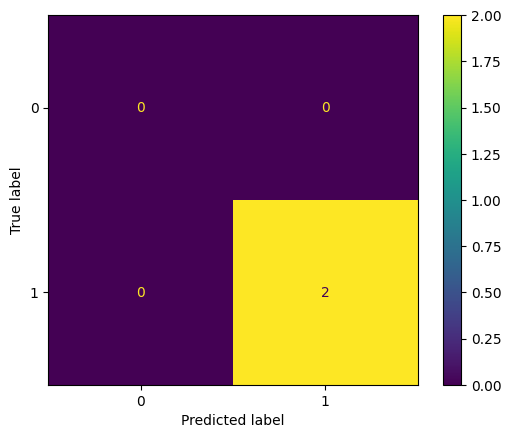

In [34]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [35]:
metrics.accuracy_score(y_test, y_pred)

1.0

Display the precision

In [36]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [1.]


Display the recall

In [37]:
# Calculate recall
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [1.]


Display the f1-score

In [38]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [1.]


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [47]:
# make a prediction for an example of an out-of-sample observation
knn.predict([[4.0,6.0]])

array([0])

In [43]:
passer = data[data.Pass == 1]
failer = data[data.Pass == 0]

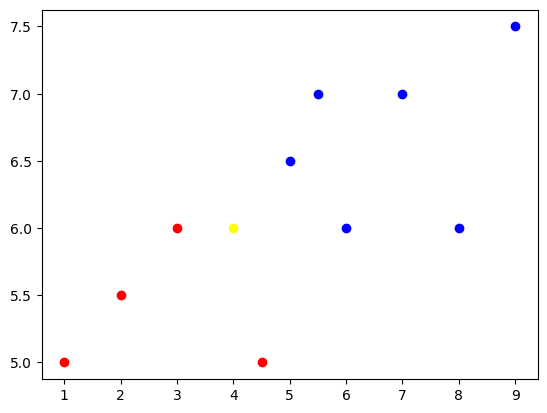

In [48]:
passerx = passer.HoursStudied
passery = passer.SleepHours
plt.scatter(passerx, passery,color='blue')

failerx = failer.HoursStudied
failery = failer.SleepHours
plt.scatter(failerx, failery,color='red')

unknownx = [4.0]
unknowny = [6.0]
plt.scatter(unknownx, unknowny,color='yellow')

plt.show()